In [1]:
# setting things up for transferring a dataset from kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
# !: ye khud likhna hay
# 'kaggle competitions download -c dogs-vs-cats': ye kaggle k dataset k page par, vaheen say milay ga

!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:38<00:00, 22.6MB/s]
100% 812M/812M [00:38<00:00, 22.3MB/s]


In [4]:
# saari ki saari zipped files, jahan jahan bhi pri hain unzip ho jayain gi
# bhtar hay k is k bad, zipped folders del kr do

!unzip \*.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [5]:
# already unzipped del kr dena yad say
# ab agar zip k andar say kuch new zipped data niklay to is liye dobara chlai
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      
  inflating: train/dog.5521.jpg      

In [6]:
# is saray process ki details notebook #2 main daikh lo

import os, shutil

In [7]:
original_dataset_dir  =  '/content/train'

base_dir              =  '/content/cats n dogs'

os.mkdir(base_dir)


In [8]:
train_dir                 =    os.path.join(base_dir, 'train')
os.mkdir(train_dir)


validation_dir            =    os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)


test_dir                  =    os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)



validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)



test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [10]:
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)
    dst  =  os.path.join(validation_cats_dir,  fname)
    shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


In [11]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)
    dst  =  os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)




# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)




# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)
    dst  =  os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [12]:
print('total training cat images:'   , len(os.listdir(train_cats_dir)))
print('total training dog images:'   , len(os.listdir(train_dogs_dir)))
print('total validation cat images:' , len(os.listdir(validation_cats_dir)))
print('total validation dog images:' , len(os.listdir(validation_dogs_dir)))
print('total test cat images:'       , len(os.listdir(test_cats_dir)))
print('total test dog images:'       , len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## FEATURE EXTRACTION WITH DATA AUGMENTATION

Because models behave just like layers, you can add a model (like conv_base) to a
Sequential model just like you would add a layer

In [13]:
# see notebook 3 for details of this cell

from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights      =  'imagenet',
                  include_top  =  False,
                  input_shape  =  (150, 150, 3))


58889256/58889256 [==============================] - 4s 0us/step


#### Listing 5.20: Adding a densely connected classifier on top of the convolutional base

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [15]:
 model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### Freezing a Base

 Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being
updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because
the Dense layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously
learned.

In Keras, you freeze a network by setting its trainable attribute to False:

In [16]:
# isay sir further smjhayain gay, k trainable weights say EXACTLY kia murad hay

print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))




This is the number of trainable weights before freezing the conv base: 30


In [17]:
 # freezing

 conv_base.trainable = False


In [18]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights after freezing the conv base: 4


With this setup, only the weights from the two Dense layers that you added will be
trained. That’s a total of four weight tensors: two per layer (the main weight matrix
and the bias vector)

### Note that in order for these changes to take effect, you must first compile the model. If you ever modify weight trainability after compilation, you should then recompile the model, or these changes will be ignored.

### Listing 5.21: Training the model end to end with a frozen convolutional base

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


train_datagen = ImageDataGenerator(
                  rescale             =  1./255,
                  rotation_range      =  40,
                  width_shift_range   =  0.2,
                  height_shift_range  =  0.2,
                  shear_range         =  0.2,
                  zoom_range          =  0.2,
                  horizontal_flip     =  True,
                  fill_mode           =  'nearest')


test_datagen = ImageDataGenerator(rescale=1./255)  # this object will be used to generate both, the validation_data as-well-as test_data



train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size  =  (150, 150),
                    batch_size   =  20,
                    class_mode   =  'binary')



validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size  =  (150, 150),
                        batch_size   =  20,
                        class_mode   =  'binary')




model.compile(loss         =  'binary_crossentropy',
                optimizer  =  optimizers.RMSprop(learning_rate=2e-5),
                metrics    =  ['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
# generator isay 20,20 k batches ki shakal main, inputs bhi day ga and labels bhi
history           =  model.fit(train_generator,
                                steps_per_epoch   =  100,
                                epochs            =  30,
                                validation_data   =  validation_generator,
                                validation_steps  =  50)


Epoch 1/30
100/100 [==============================] - 33s 218ms/step - loss: 0.5706 - acc: 0.7245 - val_loss: 0.4476 - val_acc: 0.8250
Epoch 2/30
100/100 [==============================] - 22s 221ms/step - loss: 0.4786 - acc: 0.7845 - val_loss: 0.3772 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 21s 206ms/step - loss: 0.4288 - acc: 0.8055 - val_loss: 0.3444 - val_acc: 0.8650
Epoch 4/30
100/100 [==============================] - 22s 215ms/step - loss: 0.4044 - acc: 0.8290 - val_loss: 0.3201 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 22s 223ms/step - loss: 0.3836 - acc: 0.8365 - val_loss: 0.3047 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 22s 222ms/step - loss: 0.3706 - acc: 0.8340 - val_loss: 0.3011 - val_acc: 0.8720
Epoch 7/30
100/100 [==============================] - 22s 216ms/step - loss: 0.3596 - acc: 0.8390 - val_loss: 0.2912 - val_acc: 0.8800
Epoch 8/30
100/100 [==============================] - 2

### Listing 5.19: Plotting the results

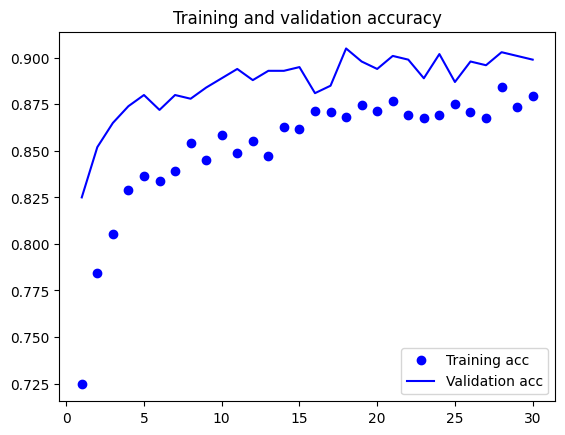

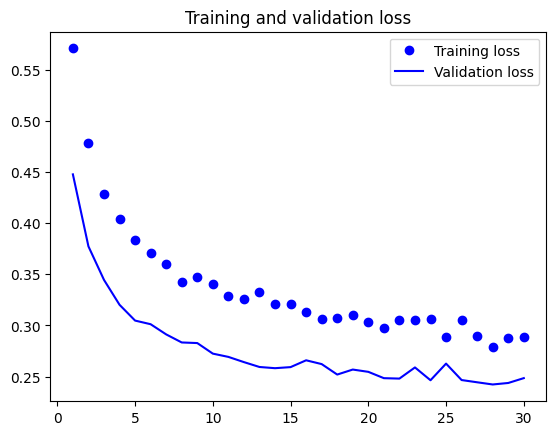

In [22]:
import matplotlib.pyplot as plt

acc      =  history.history['acc']
val_acc  =  history.history['val_acc']
loss     =  history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc    , 'bo',  label = 'Training acc')
plt.plot(epochs, val_acc, 'b' ,  label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss    , 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [23]:
test_generator = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (150, 150),
                        batch_size   =  20,
                        class_mode   =  None)


Found 1000 images belonging to 2 classes.


In [24]:
predictions = model.predict( test_generator  )


50/50 [==============================] - 4s 71ms/step


In [25]:
len( predictions )

1000

In [26]:
predictions.shape

(1000, 1)

In [27]:
print(predictions[4])

print(predictions[5])

[0.9627137]
[0.9950412]


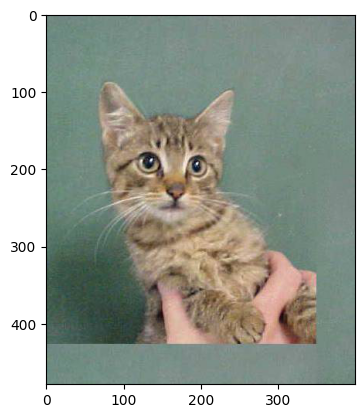

In [28]:
from tensorflow.keras.preprocessing import image


img_path     =  '/content/cats n dogs/test/cats/cat.1502.jpg'
my_img       =  image.load_img(img_path)

imgplot = plt.imshow( my_img )

plt.show()


In [ ]:
# import numpy as np

# def extract_features(directory, sample_count):

#     pics    =  np.zeros(shape=(sample_count, 150, 150, 3))

#     labels  =  np.zeros(shape=(sample_count) )


#     i=0
#     for pics_batch, labels_batch in test_generator:

#         pics[  i*batch_size : (i+1)*batch_size]  =  pics_batch

#         labels[i*batch_size : (i+1)*batch_size]  =  labels_batch

#         i += 1

#         if i * batch_size >= sample_count:
#             break
#     return pics, labels


In [ ]:
# pics_t, labels_t = extract_features('/content/cats n dogs/test/cats', 500)


In [ ]:
# labels_t[0:40]

In [ ]:
# predictions[0:40]

# 5.3.2 Fine-tuning

Another widely used technique for model reuse, **complementary to feature
extraction**, is fine-tuning.
Fine-tuning consists of
**unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers**. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant for the problem at hand.

see pg = 152 for more details

ziada tar, aik-doo layers ko unfreeze krna kaafi hta hay
- Sir Nasir Hussain

I stated earlier that it’s necessary to freeze the convolution base of VGG16 in order to
be able to train a randomly initialized classifier on top. For the same reason, it’s only
possible to **fine-tune the top layers of the convolutional base once the classifier on top
has already been trained.** If the classifier isn’t already trained, then the **error signal
propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed.** Thus the
steps for fine-tuning a network are as follow:

- Add your custom network on top of an already-trained base network.
- Freeze the base network.
- Train the part you added.
- Unfreeze some layers in the base network.
- Jointly train both these layers and the part you added.

### Unfreezing specific Layers
step 4: unfreezing the conv_base and then freezing individual layers
inside it
That's how it works!

You’ll fine-tune the last three convolutional layers, which means all layers up to
block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and
block5_conv3 should be trainable.
 Why not fine-tune more layers? Why not fine-tune the entire convolutional base?
You could. But you need to consider the following:
- Earlier layers in the convolutional base encode more-generic, reusable features,
whereas layers higher up encode more-specialized features. It’s more useful to
fine-tune the more specialized features, because these are the ones that need to
be repurposed on your new problem. There would be fast-decreasing returns in
fine-tuning lower layers.
- The more parameters you’re training, the more you’re at risk of overfitting.
The convolutional base has 15 million parameters, so it would be risky to
attempt to train it on your small dataset.

Thus, in this situation, it’s a good strategy to fine-tune only the top two or three layers
in the convolutional base. Let’s set this up, starting from where you left off in the previous example

### Listing 5.22: Freezing all layers up to a specific one

In [21]:
# conv base k tamaam trainables ko unfreeze kr dia
conv_base.trainable = True

# aik variable create kia 'set_trainable'
set_trainable = False


# conv base ki tmaam layers ki list utha li, har aik aik layer par loop chlai
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable   = True
# agar 'set_trainable', true ho, tu.. layer k trainables ko true kr do
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

# 'blcok5_conv1' say pehlay ye false hoga, so, 'blcok5_conv1' say pehlay jitni bhi layers
# hoon  gi ye on k trainables ko false kr day ga

# 'blcok5_conv1' k bad ye true ho jaye ga, or phir jitni bhi layers aayain gi
# ye on sab k trainables ko true kr day ga


Now you can begin fine-tuning the network. You’ll do this with the RMSProp optimizer, using a very low learning rate. The reason for using a low learning rate is that
**you want to limit the magnitude of the modifications you make to the representations
of the three layers you’re fine-tuning. Updates that are too large may harm these representations**

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


### Listing 5.23 Fine-tuning the model

In [31]:
model.compile(loss = 'binary_crossentropy',
                      optimizer  =  optimizers.RMSprop(learning_rate=1e-5),
                      metrics    =  ['acc'])


In [33]:
history = model.fit(
            train_generator,
            steps_per_epoch   =  100,
            epochs            =  100,
            validation_data   =  validation_generator,
            validation_steps  = 50 )


Epoch 1/100
100/100 [==============================] - 21s 212ms/step - loss: 0.2857 - acc: 0.8770 - val_loss: 0.2216 - val_acc: 0.9080
Epoch 2/100
100/100 [==============================] - 22s 217ms/step - loss: 0.2795 - acc: 0.8780 - val_loss: 0.2122 - val_acc: 0.9160
Epoch 3/100
100/100 [==============================] - 21s 212ms/step - loss: 0.2458 - acc: 0.8990 - val_loss: 0.2032 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 22s 216ms/step - loss: 0.2229 - acc: 0.9090 - val_loss: 0.1989 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 21s 214ms/step - loss: 0.2151 - acc: 0.9110 - val_loss: 0.1870 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 21s 208ms/step - loss: 0.1941 - acc: 0.9175 - val_loss: 0.1939 - val_acc: 0.9200
Epoch 7/100
100/100 [==============================] - 22s 217ms/step - loss: 0.1763 - acc: 0.9290 - val_loss: 0.1810 - val_acc: 0.9290
Epoch 8/100
100/100 [===========================

### Listing 5.19: Plotting the results

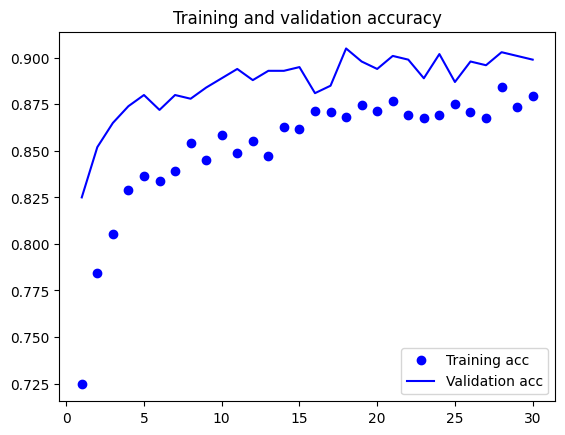

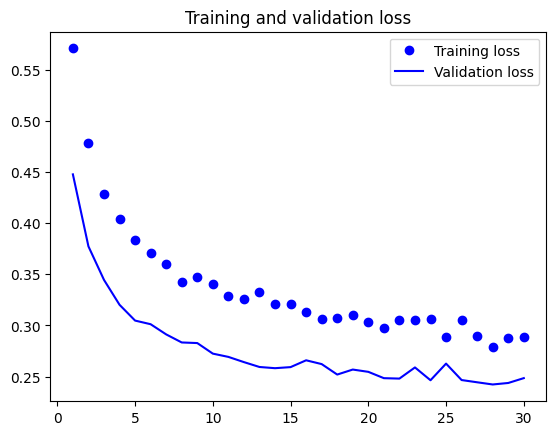

In [ ]:
import matplotlib.pyplot as plt

acc      =  history.history['acc']
val_acc  =  history.history['val_acc']
loss     =  history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc    , 'bo',  label = 'Training acc')
plt.plot(epochs, val_acc, 'b' ,  label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss    , 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


These curves look noisy. To make them more readable, you can smooth them by
replacing every loss and accuracy with exponential moving averages of these quantities. Here’s a trivial utility function to do this

### Listing 5.24: Smoothing the plots

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
          smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
          smooth_curve(val_acc), 'b', label='Smoothed validation acc')

plt.title('Training and validation accuracy')

plt.legend()

plt.figure()

plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()


Note that the loss curve doesn’t show any real improvement (in fact, it’s deteriorating). You may wonder, how could accuracy stay stable or improve if the loss isn’t
decreasing? The answer is simple: what you display is an average of pointwise loss values; but what matters for accuracy is the distribution of the loss values, not their average, because accuracy is the result of a binary thresholding of the class probability
predicted by the model. The model may still be improving even if this isn’t reflected
in the average loss.

### Evaluating the model on test Data

In [ ]:
test_generator = test_datagen.flow_from_directory(
                  test_dir,
                  target_size  =  (150, 150),
                  batch_size   =  20,
                  class_mode   =  'binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)


Here you get a test accuracy of 97%. In the original Kaggle competition around this
dataset, this would have been one of the top results. But using modern deep-learning
techniques, you managed to reach this result using only a small fraction of the training data available (about 10%). There is a huge difference between being able to train
on 20,000 samples compared to 2,000 samples!

### Wrapping Up

Here’s what you should take away from the exercises in the past two sections:
- Convnets are the best type of machine-learning models for computer-vision
tasks. It’s possible to train one from scratch even on a very small dataset, with
decent results.
- On a small dataset, overfitting will be the main issue. Data augmentation is a
powerful way to fight overfitting when you’re working with image data.
- It’s easy to reuse an existing convnet on a new dataset via feature extraction.
This is a valuable technique for working with small image datasets.
- As a complement to feature extraction, you can use fine-tuning, which adapts to
a new problem some of the representations previously learned by an existing
model. This pushes performance a bit further.
Now you have a solid set of tools for dealing with image-classification problems—in
particular with small datasets.

isi fine tuning k topic, ko multiple sources say parho, e.g: youtube & d/f books etc...

mera apna mashwara ye hay k andrew ng k lectures zroor daikh lena, fine tuning par

Apni taraf say dataset utha k kaggle say os pr ye sari practice bhi kro.
